In [73]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# League Wrapped: Your League of Legends Season in Review
By Ian Lum and Mo Ampane

## Introduction

Online games are plagued by toxicity. Many try to use gaming as a form of escape and entertainment but are unfortunately met by a barrage of insults, from a harasser who sits miles away in their room, protected by the barrier of the internet. The game “League of Legends” has one of the most notoriously toxic communities, which has driven many gamers to avoid the volatility of playing with random teammates and only play with their friends who they can trust—myself included. However, even people that you may consider friends can still exhibit extremely toxic behavior when gaming.


Toxicity is often targeted towards those who appear to be playing poorly, with no regard for external context. The slang term, “diff,” short for “difference” has even been coined by the League of Legends community in order to harass these underperformers, used to indicate a lower level of skill of the underperformer when compared to their respective opponent. Our project strives to be a stepping stone in the path of lessening toxicity by showing a player their worst statistics in order to tell the story that everyone sucks sometimes.


## Setup

In order to run the code below, you will need to compelte the following steps

Creating an API key
1. Sign in at the [Riot Developer Website](https://developer.riotgames.com/)
2. Generate/Regenerate an API key
3. Create a file called `key.txt` in the root directory
4. Copy the API key into the first line of `key.txt`

Run the following line in the command prompt to install `riotwatcher`
> pip install riotwatcher

## Methodology

We collected our data through the API of Riot Games, the developer of League of Legends. The League of Legends API works through creating a `LolWatcher` object, which the function `create_watcher` does.

In [74]:
from modules.scraper import create_watcher
watcher = create_watcher()

TypeError: create_watcher() missing 1 required positional argument: 'filepath'

Next, `get_season_matchlist` creates a list of **match ids** for all matches that a given **summoner** played during **season 12**.
- Match ids are strings that corresond to a certain match in the API. 
- Summoners are what League of Legends refers to players as
- Season 12 refers to the period of time between 1/07/2022 and 11/14/2022. League of Legends splits the game into "seasons", with each "season" lasting just under a year, with the remaining time in the year being the "preseason"

Ian's summoner name, Among Us Jimin, will be used the examples below. Additionally, the game is split into various world regions, in this case the region that Ian plays in is North America, denoted `na1`.

In [ ]:
from modules.scraper import get_season_matchlist
SUMMONER_NAME = 'Among Us Jimin'
REGION = 'na1'
matchlist = get_season_matchlist(watcher, SUMMONER_NAME, REGION)
print(f"Ian played {len(matchlist)} matches in season 12")
print(f"An example of a match id is {matchlist[0]}")

Ian played 407 matches in season 12
An example of a match id is NA1_4491860733


Finally, `matchlist` is passed into `get_data_from_matchlist`. This function collects statistics for the given summoner in each match of the matchlist and compiles it into DataFrame. This DataFrame is saved to the file `data/[summoner_name].csv`.

The function takes about 2 minutes per 100 matches, due to the rate limiting of the API. Because of this, the function below is commented out so it doesn't run when "Run All" is clicked. If you wish to see the function run, feel free to uncomment and execute the cell below.

In [ ]:
# from scraper import get_data_from_matchlist
# ian_data = get_data_from_matchlist(watcher, SUMMONER_NAME, matchlist, REGION)

Instead, you can load the pre-scraped data using the cell below.

In [ ]:
import pandas as pd
ian_data = pd.read_csv('data/Among Us Jimin.csv', index_col=0)

To get a sense of the data, the head of the data is displayed below.

In [ ]:
ian_data.head()

,allInPings,assistMePings,assists,baitPings,baronKills,basicPings,bountyLevel,challenges,champExperience,champLevel,...,turretKills,turretTakedowns,turretsLost,unrealKills,visionClearedPings,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
NA1_4491860733,0.0,0.0,14,0.0,0,14.0,0,"{'12AssistStreakCount': 0, 'abilityUses': 338,...",15444,16,...,0,1,9,0,0.0,103,9,8,53,False
NA1_4491823727,0.0,0.0,9,0.0,0,12.0,0,"{'12AssistStreakCount': 0, 'abilityUses': 174,...",9336,12,...,0,0,10,0,0.0,68,5,6,35,False
NA1_4490062183,0.0,0.0,16,0.0,0,7.0,0,"{'12AssistStreakCount': 0, 'abilityUses': 253,...",16796,17,...,0,0,11,0,0.0,60,4,2,32,False
NA1_4487436317,0.0,0.0,35,0.0,0,23.0,0,"{'12AssistStreakCount': 2, 'abilityUses': 235,...",14112,15,...,0,5,7,0,0.0,68,4,1,25,True
NA1_4487390868,0.0,0.0,12,0.0,0,11.0,0,"{'12AssistStreakCount': 1, 'abilityUses': 295,...",11928,14,...,1,2,10,0,0.0,86,7,11,35,False


The data was then analyzed to calculate 5 aggregate statistics: The 5 **champions** with the worst **KDA**, the 5 **champions** with the worst **winrate**, the game with the most deaths and the **champion** that was played, the game with the worst **cs/m** and the **champion** that was played, and the game with the worst **vision score** per minute and the **champion** that was played.

Vocabulary:
- Champion: Playable characters
- KDA: Short for kill death assist ratio a ratio that is calculated by (kills + assists)/deaths
- winrate: Percentage of games won, wins/games played
- cs/m: Short for creep score per minute, an integral part of League of Legends, a higher creep score means you were better at collecting gold, which makes your character more powerful
- vision score: Another integral part of League of Legends, you are able to scout for enemies by gaining vision, and the efficacy of your vision collection is tracked through vision score

In [ ]:
from modules.analysis import worst_kda
print("The champions that Ian had the worst KDA with were:")
worst_kda(ian_data)

The champions that Ian had the worst KDA with were:


[{'champ': 'Olaf', 'kda': 0.16666666666666666, 'games_played': 1},
 {'champ': 'Nilah', 'kda': 0.7142857142857143, 'games_played': 1},
 {'champ': 'Garen', 'kda': 0.8181818181818182, 'games_played': 2},
 {'champ': 'Nasus', 'kda': 1.0, 'games_played': 1},
 {'champ': 'Viego', 'kda': 1.125, 'games_played': 1}]

In [ ]:
from modules.analysis import worst_winrate
print("The champions that Ian had the worst winrate with were:")
worst_winrate(ian_data)

The champions that Ian had the worst winrate with were:


[{'champ': 'Zilean', 'winrate': 0.0, 'games_played': 7},
 {'champ': 'Evelynn', 'winrate': 0.16666666666666666, 'games_played': 6},
 {'champ': 'Seraphine', 'winrate': 0.2857142857142857, 'games_played': 7},
 {'champ': 'Kaisa', 'winrate': 0.3, 'games_played': 10},
 {'champ': 'Quinn', 'winrate': 0.3333333333333333, 'games_played': 6}]

In [ ]:
from modules.analysis import most_deaths
(deaths, champ) = most_deaths(ian_data)
print(f"The most deaths Ian had in one game was {deaths}, while playing {champ}")

The most deaths Ian had in one game was 13, while playing Ashe


In [ ]:
from modules.analysis import least_cs
(cs, champ) = least_cs(ian_data)
print(f"The cs/m Ian had in one game was {round(cs,2)}, while playing {champ}")

The cs/m Ian had in one game was 2.94, while playing Janna


In [ ]:
from modules.analysis import worst_vs
(vision, champ) = worst_vs(ian_data)
print(f"The vision score per minute Ian had in one game was {round(vision,2)}, while playing {champ}")

The vision score per minute Ian had in one game was 0.06, while playing Karma


## Results

After calculating the five aggregate statistics

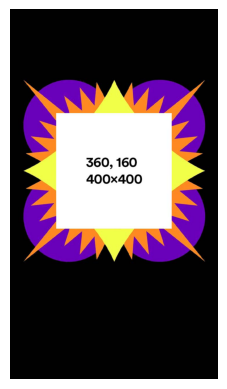

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('assets/TEMPLATE_deaths.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()
